In [ ]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

In [3]:
ionomics <- read.csv('New_ionStats_leafstage_XYZ.csv',colClasses =c(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [4]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [5]:
# Fit the model
model <- lda(leaf_stage~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$leaf_stage)
model

[1] 0.7083333

Call:
lda(leaf_stage ~ ., data = train.data)

Prior probabilities of groups:
        1         2         3 
0.3750000 0.3583333 0.2666667 

Group means:
          B11        Na23        Mg26        Al27        P31        S34
1 -0.08181776 -0.01034700 -0.09625995 -0.07151763 0.03159276 0.07036145
2 -0.14081044 -0.06052702 -0.04162313 -0.07663815 0.13138746 0.05855851
3  0.06135122 -0.04448896  0.25303675  0.40402406 0.02091159 0.18791579
          K39       Ca44        Fe54        Mn55        Co59        Ni60
1 -0.06115081 -0.1856371 -0.07112096  0.18014038  0.05545256  0.10382352
2 -0.03228593 -0.1414462  0.02250076 -0.09200919 -0.04062430  0.08529144
3  0.13556761  0.3154704  0.02141986  0.24888098  0.37674262 -0.04348991
           Cu63        Zn66        As75       Rb85       Sr88        Mo98
1 -0.0082772717 -0.12379191  0.06616653 0.05372112 -0.1367193 -0.12187412
2 -0.0002397842 -0.08884673 -0.07738480 0.03395241 -0.0460744  0.09553888
3  0.2132365250  0.25089332  0.57552530 0.299

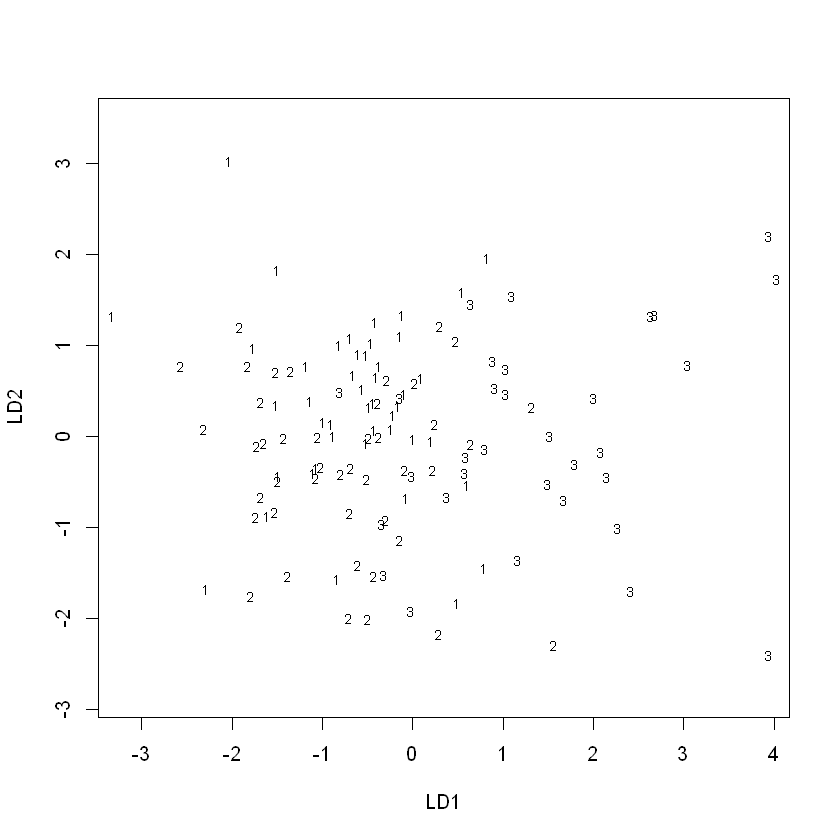

In [6]:
plot(model)

In [7]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 1 1 1
Levels: 1 2 3

,1,2,3
1,0.5189097,0.3701478,0.110942454
2,0.5404215,0.4522115,0.007367023
3,0.6036857,0.3248483,0.071466010
4,0.5861989,0.3461346,0.067666581
5,0.6637769,0.3000064,0.036216668
6,0.4439578,0.4007479,0.155294256


,LD1,LD2
1,-0.03584283,0.3270704
2,-1.38030095,0.3331802
3,-0.24328597,0.7645269
